<a href="https://colab.research.google.com/github/Devansh30032004/Customer_Churn_Pred/blob/main/customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn Prediction Model using Artificial Neural Network (ANN)**

Loading Required Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

Dataset

In [25]:
df = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [26]:
df.sample(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
59683,59684,37,Male,52,12,6,26,Premium,Quarterly,253,22,1
5789,5790,64,Female,58,1,6,19,Premium,Quarterly,530,3,1
59481,59482,54,Male,6,5,6,4,Basic,Monthly,534,26,1
11925,11926,54,Male,54,16,6,19,Standard,Annual,399,5,1
53407,53408,38,Female,54,24,7,19,Basic,Monthly,452,13,1


Preprocessing of Dataset

In [27]:
df = df.drop('CustomerID', axis=1)


In [29]:
df.sample(5)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
1022,65,Male,12,9,4,25,Premium,Monthly,779,12,0
28066,52,Female,44,5,7,19,Premium,Quarterly,146,28,1
58169,20,Male,48,30,5,23,Standard,Quarterly,226,15,1
11891,24,Male,55,9,6,24,Basic,Monthly,578,30,1
48619,59,Male,12,4,10,22,Standard,Annual,678,3,1


In [30]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

<ipython-input-30-f0312a8615ea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male':1,'Female':0},inplace=True)
<ipython-input-30-f0312a8615ea>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Male':1,'Female':0},inplace=True)


In [31]:
df.sample(5)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
46085,49,1,47,20,9,24,Premium,Monthly,436,19,1
30399,37,1,13,22,3,0,Premium,Monthly,542,4,0
29376,46,0,12,12,7,18,Premium,Quarterly,941,19,0
62978,31,1,43,20,9,17,Basic,Quarterly,252,13,1
15474,36,0,16,5,9,27,Standard,Annual,516,21,0


In [32]:
def print_unique_col_values(df):
    """
    Prints the unique values for each column in a Pandas DataFrame.

    Args:
        df: The Pandas DataFrame.
    """
    for column in df.columns:
        print(f"Unique values for '{column}': {df[column].unique()}")

print_unique_col_values(df) # Calling the function after defining it

Unique values for 'Age': [22 41 47 35 53 30 54 36 65 46 56 31 42 59 29 45 62 48 55 64 25 44 28 34
 24 27 61 57 37 51 18 23 60 40 26 52 43 19 58 33 20 39 32 38 21 63 49 50]
Unique values for 'Gender': [0 1]
Unique values for 'Tenure': [25 28 27  9 58 41 37 36 20  8 42 13  2 46 21  1 54 40 39 50 59 60 44 23
 26 31 30 51 45 19 14 24 15 47  3 17 22 57 34 29 33 35 56  5 55 48  6 32
 16 10  7 43 52 53 38  4 11 18 49 12]
Unique values for 'Usage Frequency': [14 28 10 12 24 15 11  5  4 27 23  7 17  3 30  2 19 20 18  8  6 21 26 16
 25 13 29  9 22  1]
Unique values for 'Support Calls': [ 4  7  2  5  9 10  0  6  1  3  8]
Unique values for 'Payment Delay': [27 13 29 17  2 10 28 18  8 23 21 14 25  3  6 15  1  9 30  4  0 11 16  7
 24 22 12 26 20 19  5]
Unique values for 'Subscription Type': ['Basic' 'Standard' 'Premium']
Unique values for 'Contract Length': ['Monthly' 'Annual' 'Quarterly']
Unique values for 'Total Spend': [ 598  584  757  232  533  500  574  323  687  995  526  187  758  438
  663  

Usage of One Hot Encoding for Categorical Columns

In [33]:
subscription_type_dummies = pd.get_dummies(df['Subscription Type'], prefix='Subscription')
df = pd.concat([df, subscription_type_dummies], axis=1)
df = df.drop('Subscription Type', axis=1)

In [34]:
df.dtypes

,0
Age,int64
Gender,int64
Tenure,int64
Usage Frequency,int64
Support Calls,int64
Payment Delay,int64
Contract Length,object
Total Spend,int64
Last Interaction,int64
Churn,int64


In [35]:
contract_length_dummies = pd.get_dummies(df['Contract Length'], prefix='Contract')
df = pd.concat([df, contract_length_dummies], axis=1)
df = df.drop('Contract Length', axis=1)
df.dtypes

,0
Age,int64
Gender,int64
Tenure,int64
Usage Frequency,int64
Support Calls,int64
Payment Delay,int64
Total Spend,int64
Last Interaction,int64
Churn,int64
Subscription_Basic,bool


In [36]:
df.sample(3)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription_Basic,Subscription_Premium,Subscription_Standard,Contract_Annual,Contract_Monthly,Contract_Quarterly
36970,50,1,33,29,3,26,795,9,0,True,False,False,False,True,False
22806,27,0,5,7,6,19,735,24,0,True,False,False,False,True,False
51794,28,1,39,24,7,22,656,28,1,True,False,False,False,True,False


In [37]:


for col in ['Subscription_Basic', 'Subscription_Premium', 'Subscription_Standard','Contract_Annual','Contract_Monthly','Contract_Quarterly']:
    df[col] = df[col].replace({True: 1, False: 0})

<ipython-input-37-df4bfa7af78f>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({True: 1, False: 0})


In [38]:
df.dtypes

,0
Age,int64
Gender,int64
Tenure,int64
Usage Frequency,int64
Support Calls,int64
Payment Delay,int64
Total Spend,int64
Last Interaction,int64
Churn,int64
Subscription_Basic,int64


In [39]:
df.sample(10)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription_Basic,Subscription_Premium,Subscription_Standard,Contract_Annual,Contract_Monthly,Contract_Quarterly
41459,23,1,37,2,2,28,331,22,0,0,0,1,1,0,0
16211,55,1,12,6,4,21,808,12,0,1,0,0,0,1,0
14398,29,1,7,17,10,26,711,5,0,1,0,0,0,1,0
1898,40,0,49,3,4,0,825,17,0,1,0,0,0,0,1
18669,45,0,24,30,4,18,670,17,0,0,1,0,1,0,0
9140,35,0,18,27,8,7,274,29,0,1,0,0,0,0,1
19649,63,0,35,26,6,28,244,6,1,0,0,1,1,0,0
18230,62,0,34,18,10,19,360,8,1,0,1,0,1,0,0
4135,40,0,28,3,4,18,452,1,0,1,0,0,0,0,1
20369,38,0,33,15,4,25,943,2,0,0,1,0,1,0,0


Normalizing Columns onto scale of 0-1

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled DataFrame (optional)
df.sample(10)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription_Basic,Subscription_Premium,Subscription_Standard,Contract_Annual,Contract_Monthly,Contract_Quarterly
45582,0.425532,0,0.305085,0.068966,0.5,0.100000,0.040000,0.275862,0,1,0,0,0,0,1
60621,0.191489,1,0.915254,0.827586,0.6,0.933333,0.888889,0.965517,1,1,0,0,0,0,1
50634,0.085106,0,0.322034,0.413793,0.3,0.866667,0.456667,1.000000,1,1,0,0,0,1,0
51439,0.170213,0,0.661017,0.655172,0.4,0.766667,0.123333,0.586207,1,0,1,0,0,1,0
3332,0.553191,1,0.779661,1.000000,0.9,0.833333,0.432222,0.068966,1,1,0,0,0,1,0
6094,0.638298,0,0.152542,0.344828,0.4,0.466667,0.865556,0.724138,0,1,0,0,0,0,1
16192,0.574468,0,0.593220,0.517241,0.6,0.433333,0.640000,0.965517,0,0,0,1,0,1,0
15918,0.425532,0,0.067797,0.448276,1.0,0.733333,0.331111,0.310345,1,0,1,0,0,1,0
16253,0.340426,1,0.186441,0.586207,0.9,0.200000,0.128889,0.172414,0,1,0,0,0,1,0
8000,0.531915,0,0.372881,0.275862,0.7,0.766667,0.763333,0.413793,1,0,0,1,0,1,0


In [41]:
df.dtypes

,0
Age,float64
Gender,int64
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Total Spend,float64
Last Interaction,float64
Churn,int64
Subscription_Basic,int64


Spiltting Training and Testing Datasets

In [42]:
X = df.drop('Churn', axis=1)
Y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [44]:
X_train.shape

(51499, 14)

Defining Model using ANN

In [45]:
from tensorflow.keras import Sequential, layers

model = Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model

In [48]:
from tensorflow.keras import losses, optimizers, metrics

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9318 - loss: 0.1648
Epoch 2/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9362 - loss: 0.1537
Epoch 3/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9377 - loss: 0.1518
Epoch 4/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9414 - loss: 0.1432
Epoch 5/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9454 - loss: 0.1316
Epoch 6/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9461 - loss: 0.1286
Epoch 7/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9492 - loss: 0.1212
Epoch 8/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9517 - loss: 0.1156
Epoch 9/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9547 - loss: 0.1089
Epoch 10/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9589 - loss: 0.0997


Evaluation of Model on Test data

In [50]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9567 - loss: 0.1046
Loss: 0.10152489691972733
Accuracy: 0.9589126110076904


Classification Report of Model

In [51]:
# prompt: classification report generation

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions

print(classification_report(y_test, y_pred))


403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6801
           1       0.97      0.95      0.96      6074

    accuracy                           0.96     12875
   macro avg       0.96      0.96      0.96     12875
weighted avg       0.96      0.96      0.96     12875



Epoch 1/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9602 - loss: 0.0958 - val_accuracy: 0.9659 - val_loss: 0.0909
Epoch 2/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9632 - loss: 0.0904 - val_accuracy: 0.9653 - val_loss: 0.0893
Epoch 3/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9656 - loss: 0.0863 - val_accuracy: 0.9669 - val_loss: 0.0862
Epoch 4/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9674 - loss: 0.0810 - val_accuracy: 0.9679 - val_loss: 0.0844
Epoch 5/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9673 - loss: 0.0817 - val_accuracy: 0.9686 - val_loss: 0.0775
Epoch 6/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9689 - loss: 0.0765 - val_accuracy: 0.9704 - val_loss: 0.0748
Epoch 7/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9702 - loss: 0.0728 - val_accuracy: 0.9717 - val_loss: 0.0737
Epoch 8/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9712 - loss: 0.0712 - 

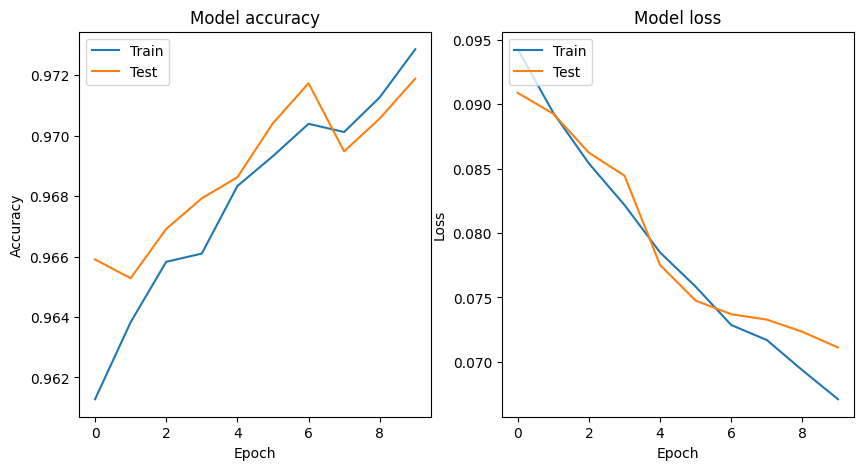

In [53]:
# prompt: plot train vs test accuracy & loss

# Assuming you have already trained the model as shown in the provided code.

# Get training history
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()